This is another way of finding the parameters from the noise using bayesian inference

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [42]:
def WaveLine(params):
    omega = params[0]
    gamma = params[1]

    return (np.exp(-(gamma)*time_axis) * np.cos(omega * time_axis))

def loglike(params):
    """The log-likelihood function."""
    t = WaveLine(params)

    chisq = np.sum((d - t)**2)
    #not the correct likelihood function for this, it is quite simple, covariance matrix is the most accurate. calculated from the noise series, that will be the correct likelihood

    return -0.5 * chisq

# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""
    # omega = 35 * (2*u[0] - 1)
    omega = 40*u[0]
    
    gamma = 5 * (2*u[1] - 1)
    return [omega, gamma]

In [43]:
# Define the dimensionality of our problem.
ndim = 2

#time_axis = np.linspace(-1, 1, 1000)
#s = (np.exp(-(2)*time_axis) * np.cos(24 * time_axis))
n = np.random.randn(1000)*5

omega = 24
gamma = 2

time_axis = np.linspace(-1, 1, 1000)
s = WaveLine([omega, gamma]) 

d = s + n

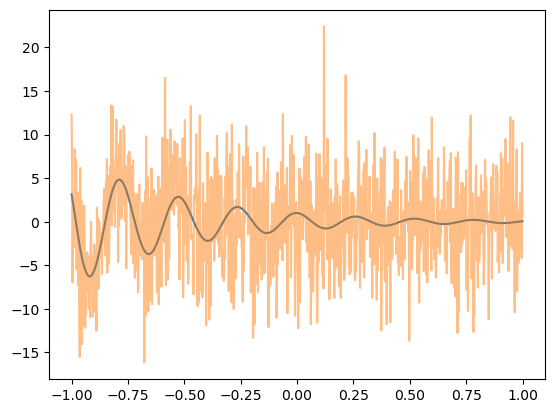

In [44]:
plt.plot(time_axis, s)
plt.plot(time_axis, d, alpha = 0.5)

In [45]:
import dynesty

# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim, nlive=500)
sampler.run_nested()
sresults = sampler.results

6273it [00:08, 700.85it/s, +500 | bound: 11 | nc: 1 | ncall: 26426 | eff(%): 26.124 | loglstar:   -inf < -12375.171 <    inf | logz: -12386.860 +/-  0.146 | dlogz:  0.001 >  0.509]


c:\Users\drpro\anaconda3\Lib\site-packages\dynesty\plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


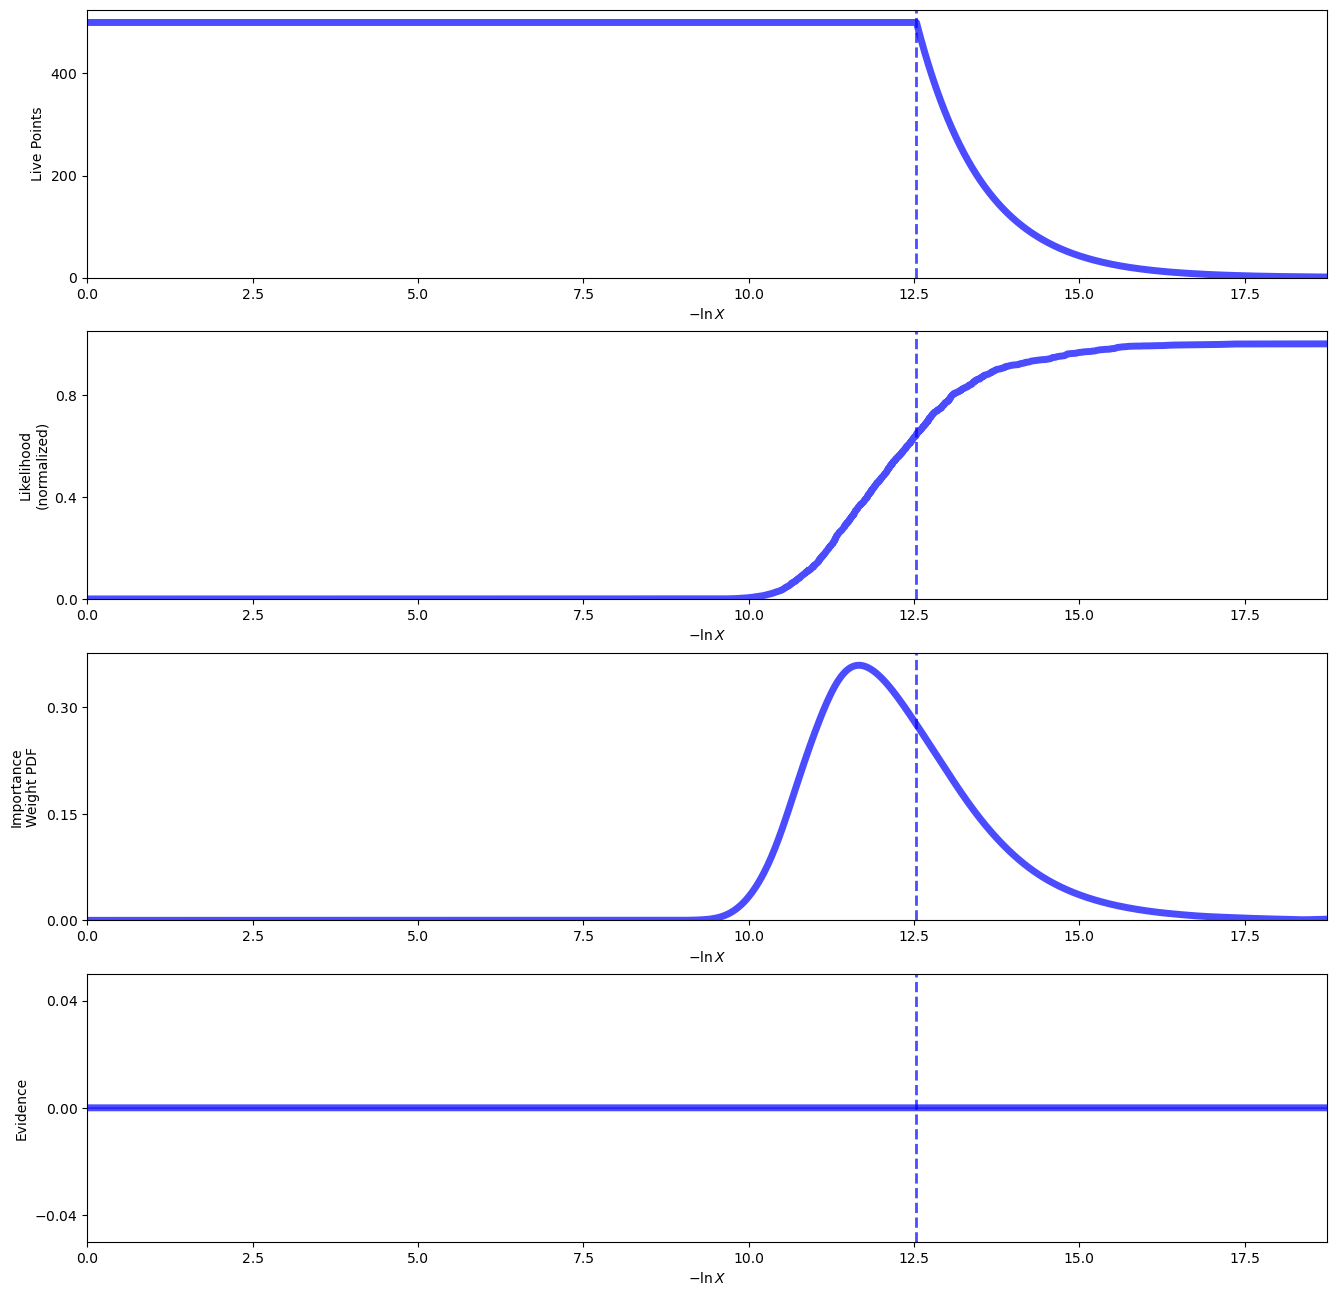

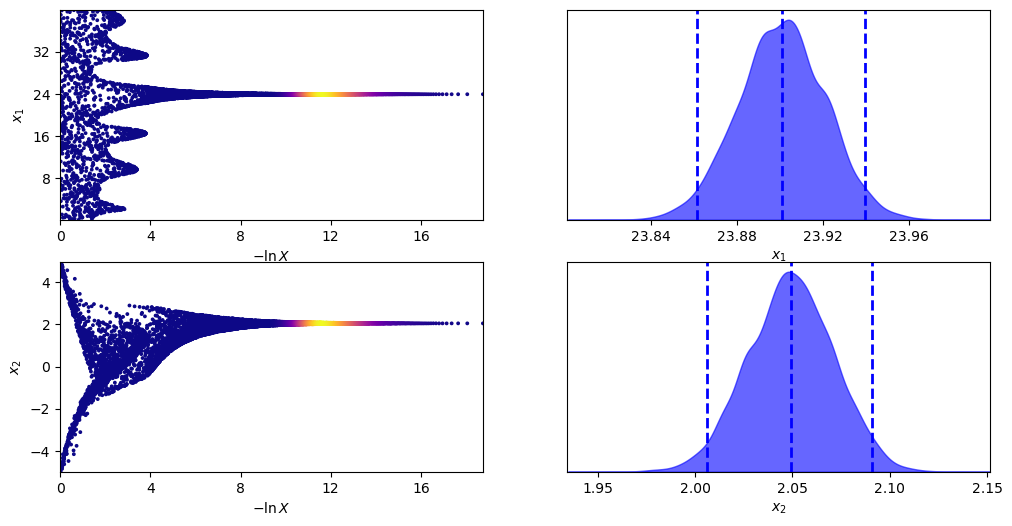

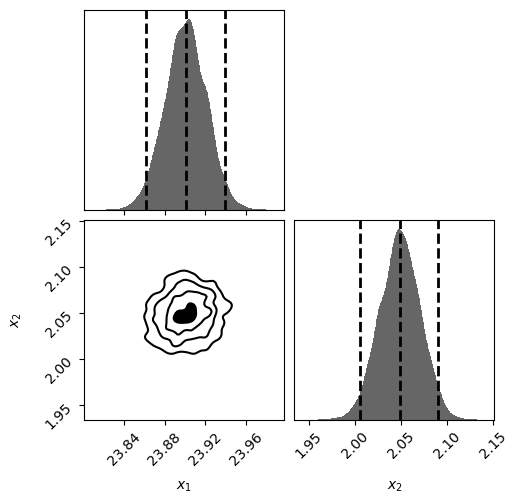

In [46]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sresults)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(sresults)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(sresults)

In [47]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = sresults.samples  # samples
weights = sresults.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = sresults.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(sresults)

print(mean)
print(cov)

[23.9007425   2.04909673]
[[4.02967503e-04 5.51035165e-05]
 [5.51035165e-05 4.77042289e-04]]


In [48]:
sigma_m = np.sqrt(cov[0, 0])
print(sigma_m)

sigma_c = np.sqrt(cov[1, 1])
print(sigma_c)

0.02007405049455236
0.02184129777560939
